In [2]:
import sys
sys.path.append(r"/home/graham/Documents/Ironhack/Final-Project")
import src

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st


In [3]:
ed_df = src.read_csv_file('/home/graham/Documents/Ironhack/Final-Project/data/excess-mortality.csv')

In [4]:
def excess_death_df(ed_df):
    # Extract the year from the 'Day' column and create a new 'Year' column in the original dataframe
    ed_df['Year'] = pd.DatetimeIndex(ed_df['Day']).year

    # Group the dataframe by 'Entity', 'Code', and 'Year' and calculate the mean
    grouped_df = ed_df.groupby(['Entity', 'Code', 'Year']).mean().reset_index()

    # Pivot the 'grouped_df' dataframe to create a new dataframe with 'Entity', 'Code', '2020 avg', '2021 avg', '2022 avg' columns
    new_df = grouped_df.pivot(index=['Entity', 'Code'], columns='Year', values='p_proj_all_ages').reset_index()

    # Flatten the multi-level columns index to a single-level index
    new_df.columns = [f'{str(col[0])}_{str(col[1])}' if isinstance(col, tuple) and col[1] != '' else str(col) for col in new_df.columns]

    # Rename the columns to 'country', 'code', '2020 avg', '2021 avg', '2022 avg', and 'year'
    new_df = new_df.rename(columns={'Entity': 'country', 'Code': 'code', 'Year': 'year'})

    # Drop the '2023' column, if it exists
    if '2023' in new_df.columns:
        new_df = new_df.drop(columns=['2023'])

    # Drop rows with missing values
    new_df = new_df.dropna()

    # Reset the index
    new_df = new_df.reset_index()

    # Drop the 'index' column
    new_df = new_df.drop(columns=['index'])

    return new_df

In [5]:
new_df = excess_death_df(ed_df)

/tmp/ipykernel_9684/2331448991.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = ed_df.groupby(['Entity', 'Code', 'Year']).mean().reset_index()


In [6]:
new_df

,country,code,2020,2021,2022
0,Albania,ALB,27.995000,40.433333,4.395833
1,Armenia,ARM,39.743333,40.510833,10.700833
2,Australia,AUS,-1.830769,2.598269,12.667292
3,Austria,AUT,8.888846,9.210769,10.517692
4,Azerbaijan,AZE,31.535833,32.774167,4.021667
...,...,...,...,...,...
87,Ukraine,UKR,7.102500,24.045000,1.920000
88,United Kingdom,GBR,13.065577,9.029231,8.052500
89,United States,USA,15.562115,17.677885,9.242885
90,Uruguay,URY,-5.903333,17.215833,11.992727


In [7]:
selected_country = st.selectbox('Select a country', new_df['country'])


# Filter the dataframe to only include the selected country
filtered_df = new_df[new_df['country'] == selected_country]

# Melt the dataframe to convert the wide format to long format
melted_df = pd.melt(filtered_df, id_vars=['country', 'code'], var_name='year', value_name='average_excess_deaths')



2023-03-13 09:29:28.776 
  command:

    streamlit run /home/graham/anaconda3/envs/streamlit/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [8]:
melted_df.dtypes

country                   object
code                      object
year                      object
average_excess_deaths    float64
dtype: object

In [9]:
new_df = excess_death_df(ed_df)

/tmp/ipykernel_9684/2331448991.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = ed_df.groupby(['Entity', 'Code', 'Year']).mean().reset_index()


In [10]:
new_df = new_df.drop(columns=['2023'])


KeyError: "['2023'] not found in axis"

In [ ]:
for column in new_df.columns:
    null_count = new_df[column].isnull().sum()
    print(f"{column}: {null_count}")

entity: 0
code: 0
2020 avg: 0
2021 avg: 7
2022 avg: 32


In [11]:
new_df = new_df.dropna()
new_df = new_df.reset_index()

In [ ]:
# new_df = new_df.drop(columns=['index'])

In [12]:
df = new_df

In [14]:
df.to_csv('/home/graham/Documents/Ironhack/Final-Project/data//excessdeath_df.csv')

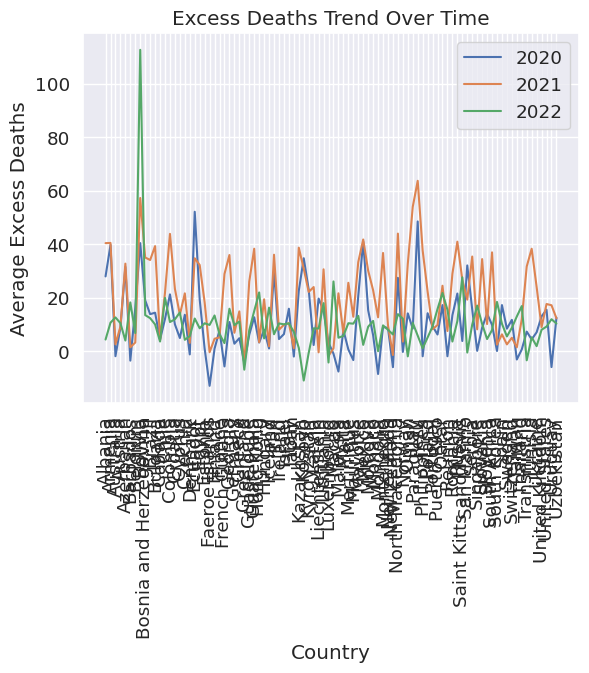

In [ ]:
# Create a line graph to show the trend over time
plt.plot(df['entity'], df['2020 avg'], label='2020')
plt.plot(df['entity'], df['2021 avg'], label='2021')
plt.plot(df['entity'], df['2022 avg'], label='2022')

# Set axis labels and plot title
plt.xlabel('Country')
plt.ylabel('Average Excess Deaths')
plt.title('Excess Deaths Trend Over Time')

# Add a legend
plt.legend()

# Rotate x-axis labels to improve readability
plt.xticks(rotation=90)

# Display the plot
plt.show()